# 실시간 트위터 분석

## 3.8

In [57]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [58]:
import tweepy
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
import pytagcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from matplotlib import font_manager, rc #한글 깨짐 현상

In [59]:
api_key = "ylylXf2ehm9dz3b3m9oIzrE4q"
api_secret = "9YSr1xGBhaVj99XUcHkHZ47xnqi4n5tIMkhCIUQom32urHbQAH"

In [60]:
auth = tweepy.OAuthHandler(api_key, api_secret)

access_token = "1171579869047607296-JT7dgVK9ORIzkPA5Mx0uPy87AC1106"
access_token_secret = "RFT9IzxyBZrO2ghj1VE2AhP8NOLUGMjnVIm6Opim0UvWk"

In [61]:
auth.set_access_token(access_token, access_token_secret)

In [62]:
api = tweepy.API(auth)

In [63]:
keyword = "realDonaldTrump";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [64]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.user_timeline(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [65]:
print(len(search)) # 문서 길이 

200


In [66]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': '#DAYTONA500 https://t.co/fT8L0EZqXh'}
1  :  {'text': 'Last week the Fake News said that a section of our powerful, under construction, Southern Border Wall “fell over”,… https://t.co/1qWtsI3SaN'}
2  :  {'text': 'Getting ready to go to the Daytona 500. Will be GREAT!'}
3  :  {'text': 'RT @SenatorTimScott: Joined @cvpayne on @FoxBusiness this afternoon to talk about how my Opportunity Zones are working across the nation fo…'}
4  :  {'text': 'RT @senatemajldr: Senate Democrats spent years saying “when it comes to Iran, we should never take the military option off the table.”\n\nBut…'}
5  :  {'text': 'RT @SenToddYoung: As the latest #jobs report shows – tax relief, regulatory reform, and trade deals like #USMCA are fueling our economy &amp; p…'}
6  :  {'text': 'RT @SenJohnThune: While Dems continue to peddle their socialist fantasies, GOP economic policies have made life better for Americans.\n\nAnd…'}
7  :  {'text': 'RT @SenateGOP: Our booming economy is drawing Americans 

In [67]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/Trump.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [68]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [69]:
file = open(os.getcwd()+'/Trump.txt', mode='r', encoding='utf-8')

In [70]:
trump = file.readlines()

In [71]:
sentence = []
for line in trump:
    sentence.append(line)
file.close()

In [72]:
total = ''
for i in range(len(sentence)):
    total += sentence[i]

In [73]:
only_english = re.sub('[^a-zA-Z]', ' ', total)

In [74]:
lower_case = only_english.lower()

In [75]:
words = lower_case.split()

In [76]:
import nltk
nltk.download()
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [77]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

2560


['daytona', 'https', 'co', 'ft', 'l', 'ezqxh', 'last', 'week', 'fake', 'news']

In [78]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]

['daytona', 'https', 'co', 'ft', 'l', 'ezqxh', 'last', 'week', 'fake', 'news']

In [79]:
tagged = nltk.pos_tag(words)

In [80]:
nouns = [word for word, pos in tagged if pos in ['NN', 'NNP']]

In [81]:
nouns

['daytona',
 'https',
 'co',
 'ft',
 'l',
 'ezqxh',
 'week',
 'news',
 'section',
 'power',
 'construct',
 'border',
 'wall',
 'qwtsi',
 'san',
 'rt',
 'senatortimscott',
 'join',
 'cvpayn',
 'afternoon',
 'talk',
 'zone',
 'work',
 'nation',
 'fo',
 'rt',
 'senatemajldr',
 'democrat',
 'year',
 'militari',
 'option',
 'tabl',
 'rt',
 'sentoddyoung',
 'job',
 'report',
 'tax',
 'relief',
 'regulatori',
 'reform',
 'trade',
 'deal',
 'fuel',
 'economi',
 'amp',
 'p',
 'rt',
 'senjohnthun',
 'dem',
 'continu',
 'fantasi',
 'gop',
 'econom',
 'polici',
 'life',
 'rt',
 'senategop',
 'boom',
 'sidelin',
 'work',
 'rate',
 'year',
 'job',
 'rt',
 'job',
 'creat',
 'month',
 'economi',
 'continu',
 'fire',
 'cylind',
 'https',
 'co',
 'q',
 'w',
 'rt',
 'gop',
 'econom',
 'work',
 'continu',
 'rt',
 'senategop',
 'chairman',
 'year',
 'abraham',
 'lincoln',
 'join',
 'life',
 'th',
 'presid',
 'http',
 'rt',
 'senategop',
 'senat',
 'floor',
 'chairman',
 'runner',
 'rt',
 'senategop',
 'rea

In [82]:
word = " "
for i in range(len(nouns)):
    word = word + str(nouns[i].split(",")[0]) + " "
    
word

' daytona https co ft l ezqxh week news section power construct border wall qwtsi san rt senatortimscott join cvpayn afternoon talk zone work nation fo rt senatemajldr democrat year militari option tabl rt sentoddyoung job report tax relief regulatori reform trade deal fuel economi amp p rt senjohnthun dem continu fantasi gop econom polici life rt senategop boom sidelin work rate year job rt job creat month economi continu fire cylind https co q w rt gop econom work continu rt senategop chairman year abraham lincoln join life th presid http rt senategop senat floor chairman runner rt senategop realdonaldtrump mastermind senategop februari celebr honor success contribut rt senrickscott communiti everlast contribut state futur togeth rt senategop democrat collar boom continu watch https co yerqvdpw rt senjohnbarrasso econom freedom market enemi senrubiopress traffick right crisi sen rubio join rt feel economi amp futur econom boom potus https c daytona https co ft l ezqxh week news secti

In [83]:
word = re.sub("https", "", word)

In [84]:
wordcloud = WordCloud(max_font_size=200, font_path = 'C:\\Windows\\Fonts\\HMKMMAG.ttf', stopwords=STOPWORDS, background_color='#FFFFFF',width=1200,height=800, max_words=50)

In [85]:
wordcloud = wordcloud.generate(word)

(-0.5, 1199.5, 799.5, -0.5)

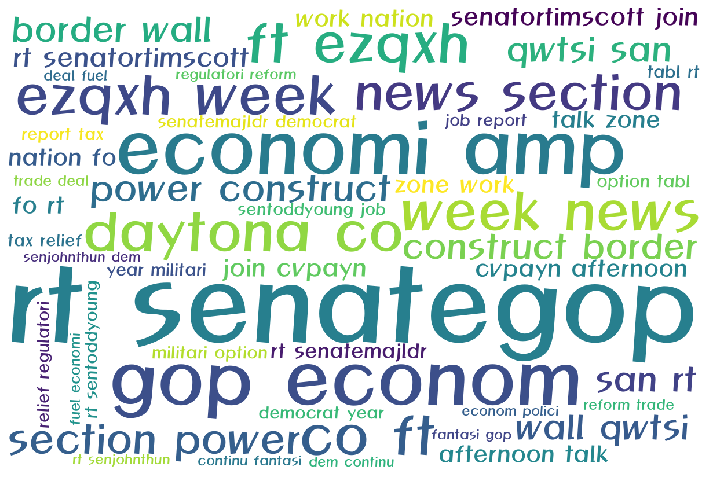

In [86]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')

## 3.9

In [87]:
keyword = "노무현";     # 자신이 검색하고 싶은 키워드 입력 
search = [] # 크롤링 결과 저장할 변수   

In [88]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [89]:
print(len(search)) # 문서 길이 

150


In [90]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @jsaclova: 내가 볼때 민주당 새끼들은\n친노, 친문이 대권을 잡는 것보다\n자한당이 집권하는게 더 이득이라고 생각하는\n모지리들의 집합으로 보인다. \n어쩌다 운이 좋게 노무현, 문재인 두분이 \n민주당을 선택한것일뿐. \n20년동안 달라진거는…'}
1  :  {'text': "RT @Lespic7: 요새 먼가 북따닥을 후다닥의 힙한 치환정도로 쓰는게 이상한 유행같은데 보기 거북해서 씀 노무현 전 대통령 조롱 음원합성물에서 생전 육성 중 '부끄러운 줄 알아야지'와 '기분 딱 좋다'에서 음절을 추출한 추임새임 걍 쉽게말해서…"}
2  :  {'text': "RT @Lespic7: 요새 먼가 북따닥을 후다닥의 힙한 치환정도로 쓰는게 이상한 유행같은데 보기 거북해서 씀 노무현 전 대통령 조롱 음원합성물에서 생전 육성 중 '부끄러운 줄 알아야지'와 '기분 딱 좋다'에서 음절을 추출한 추임새임 걍 쉽게말해서…"}
3  :  {'text': "RT @Lespic7: 요새 먼가 북따닥을 후다닥의 힙한 치환정도로 쓰는게 이상한 유행같은데 보기 거북해서 씀 노무현 전 대통령 조롱 음원합성물에서 생전 육성 중 '부끄러운 줄 알아야지'와 '기분 딱 좋다'에서 음절을 추출한 추임새임 걍 쉽게말해서…"}
4  :  {'text': 'RT @seanmount: 문빠 저격하는 저 조까튼 기사 상당히 기시감이 있다\n\n2004년 김어준, \n“노빠들이 문제야. \n노무현은 노빠들을 적이라고 생각해야 돼.” https://t.co/6S8T5SvPQB'}
5  :  {'text': 'RT @bdecem52: 봉준호 생가 터 조성, 봉준호 동상 공약…‘기생충’에 숟가락 얹기\nhttps://t.co/b8UghQ9gCY\n작년에 문재인 생가에 기념관 만든다며\n수백억 예산을 책정 했다가 된서리를 맞았다\n서푼짜리 영화 하나 만들었다고 또…'}
6  :  {'text': 'RT @park_uneum: 깨어있는 시민여러분~\n언제나 건강, 건승, 행복하십

In [91]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/노무현.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [92]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [93]:
file = open(os.getcwd()+'/노무현.txt', mode='r', encoding='utf-8')

In [94]:
trump = file.readlines()

In [95]:
sentence = []
for line in trump:
    sentence.append(line)
file.close()

In [96]:
nlp = Twitter()

nouns = []

In [97]:
for s in sentence:
    n = nlp.nouns(s)
    nouns.append(n)

In [98]:
nouns

[['내', '볼때', '민주당', '새끼'],
 ['친노', '친문', '대권', '것'],
 ['자', '한당', '집권', '더', '이득', '생각'],
 ['지리', '집합'],
 ['운', '노무현', '문재인', '분'],
 ['민주당', '선택', '것', '뿐'],
 [],
 ['요새',
  '북따닥',
  '후다닥',
  '힙',
  '치',
  '환정',
  '도로',
  '유행',
  '보기',
  '노무현',
  '전',
  '대통령',
  '조롱',
  '음원',
  '합성',
  '물',
  '생전',
  '육성',
  '중',
  '줄',
  '기분',
  '음절',
  '추출',
  '추임새임',
  '말'],
 ['요새',
  '북따닥',
  '후다닥',
  '힙',
  '치',
  '환정',
  '도로',
  '유행',
  '보기',
  '노무현',
  '전',
  '대통령',
  '조롱',
  '음원',
  '합성',
  '물',
  '생전',
  '육성',
  '중',
  '줄',
  '기분',
  '음절',
  '추출',
  '추임새임',
  '말'],
 ['요새',
  '북따닥',
  '후다닥',
  '힙',
  '치',
  '환정',
  '도로',
  '유행',
  '보기',
  '노무현',
  '전',
  '대통령',
  '조롱',
  '음원',
  '합성',
  '물',
  '생전',
  '육성',
  '중',
  '줄',
  '기분',
  '음절',
  '추출',
  '추임새임',
  '말'],
 ['문빠', '저격', '저', '기사', '기시감'],
 [],
 ['김어준'],
 ['노빠들', '문제'],
 ['노무현', '노빠들', '적', '생각'],
 ['봉준호', '생가', '터', '조성', '봉준호', '동상', '공약', '기생충', '숟가락'],
 [],
 ['작년', '문재인', '생가', '기념관'],
 ['예산', '책정', '된서리'],
 ['서푼', '영화', '하나', '또'],
 ['

In [99]:
import itertools

nouns = list(itertools.chain(*nouns))

In [100]:
nouns

['내',
 '볼때',
 '민주당',
 '새끼',
 '친노',
 '친문',
 '대권',
 '것',
 '자',
 '한당',
 '집권',
 '더',
 '이득',
 '생각',
 '지리',
 '집합',
 '운',
 '노무현',
 '문재인',
 '분',
 '민주당',
 '선택',
 '것',
 '뿐',
 '요새',
 '북따닥',
 '후다닥',
 '힙',
 '치',
 '환정',
 '도로',
 '유행',
 '보기',
 '노무현',
 '전',
 '대통령',
 '조롱',
 '음원',
 '합성',
 '물',
 '생전',
 '육성',
 '중',
 '줄',
 '기분',
 '음절',
 '추출',
 '추임새임',
 '말',
 '요새',
 '북따닥',
 '후다닥',
 '힙',
 '치',
 '환정',
 '도로',
 '유행',
 '보기',
 '노무현',
 '전',
 '대통령',
 '조롱',
 '음원',
 '합성',
 '물',
 '생전',
 '육성',
 '중',
 '줄',
 '기분',
 '음절',
 '추출',
 '추임새임',
 '말',
 '요새',
 '북따닥',
 '후다닥',
 '힙',
 '치',
 '환정',
 '도로',
 '유행',
 '보기',
 '노무현',
 '전',
 '대통령',
 '조롱',
 '음원',
 '합성',
 '물',
 '생전',
 '육성',
 '중',
 '줄',
 '기분',
 '음절',
 '추출',
 '추임새임',
 '말',
 '문빠',
 '저격',
 '저',
 '기사',
 '기시감',
 '김어준',
 '노빠들',
 '문제',
 '노무현',
 '노빠들',
 '적',
 '생각',
 '봉준호',
 '생가',
 '터',
 '조성',
 '봉준호',
 '동상',
 '공약',
 '기생충',
 '숟가락',
 '작년',
 '문재인',
 '생가',
 '기념관',
 '예산',
 '책정',
 '된서리',
 '서푼',
 '영화',
 '하나',
 '또',
 '시민',
 '여러분',
 '건강',
 '건승',
 '문빠',
 '저격',
 '저',
 '기사',
 '기시감',
 '김어준',
 '노빠들',
 '

In [101]:
word = " "
for i in range(len(nouns)):
    word = word + str(nouns[i].split(",")[0]) + " "
    
word

' 내 볼때 민주당 새끼 친노 친문 대권 것 자 한당 집권 더 이득 생각 지리 집합 운 노무현 문재인 분 민주당 선택 것 뿐 요새 북따닥 후다닥 힙 치 환정 도로 유행 보기 노무현 전 대통령 조롱 음원 합성 물 생전 육성 중 줄 기분 음절 추출 추임새임 말 요새 북따닥 후다닥 힙 치 환정 도로 유행 보기 노무현 전 대통령 조롱 음원 합성 물 생전 육성 중 줄 기분 음절 추출 추임새임 말 요새 북따닥 후다닥 힙 치 환정 도로 유행 보기 노무현 전 대통령 조롱 음원 합성 물 생전 육성 중 줄 기분 음절 추출 추임새임 말 문빠 저격 저 기사 기시감 김어준 노빠들 문제 노무현 노빠들 적 생각 봉준호 생가 터 조성 봉준호 동상 공약 기생충 숟가락 작년 문재인 생가 기념관 예산 책정 된서리 서푼 영화 하나 또 시민 여러분 건강 건승 문빠 저격 저 기사 기시감 김어준 노빠들 문제 노무현 노빠들 적 생각 경향 노 서거 조롱 듯 기사 울분 눈물 노무현 문재인 대통령 우리 깨 시민 연대 노무현 우리 길 때 빛 대한민국 민주주의 특검 수용 당시 노무현 문재인 비롯 참모 진의 견인 구가 힘 발휘 참모 진 대부분 지금 정권 음양 권력 핵 인물 굳이 이름 거론 김 당시 대북 송금 특검 상황 김대중 자서전 비롯 관련 자료 취합해 정리 김대중 사법 처리 선 얘기 진행 요로 통해 노무현 대화 요청 특검 절대 수용 수 실망 의견 요새 북따닥 후다닥 힙 치 환정 도로 유행 보기 노무현 전 대통령 조롱 음원 합성 물 생전 육성 중 줄 기분 음절 추출 추임새임 말 요새 북따닥 후다닥 힙 치 환정 도로 유행 보기 노무현 전 대통령 조롱 음원 합성 물 생전 육성 중 줄 기분 음절 추출 추임새임 말 요새 북따닥 후다닥 힙 치 환정 도로 유행 보기 노무현 전 대통령 조롱 음원 합성 물 생전 육성 중 줄 기분 음절 추출 추임새임 말 문재인 맘 노무현 칭찬 새끼 제일 내 볼때 민주당 새끼 친노 친문 대권 것 자 한당 집권 더 이득 생각 지리 집합 운 노무현 문재인 분 민주당 선택 것 뿐 요새 북따닥 후다닥 

In [102]:
wordcloud = WordCloud(max_font_size=200, font_path = 'C:\\Windows\\Fonts\\HMKMMAG.ttf', stopwords=STOPWORDS, background_color='#FFFFFF',width=1200,height=800, max_words = 50)

In [103]:
wordcloud = wordcloud.generate(word)

(-0.5, 1199.5, 799.5, -0.5)

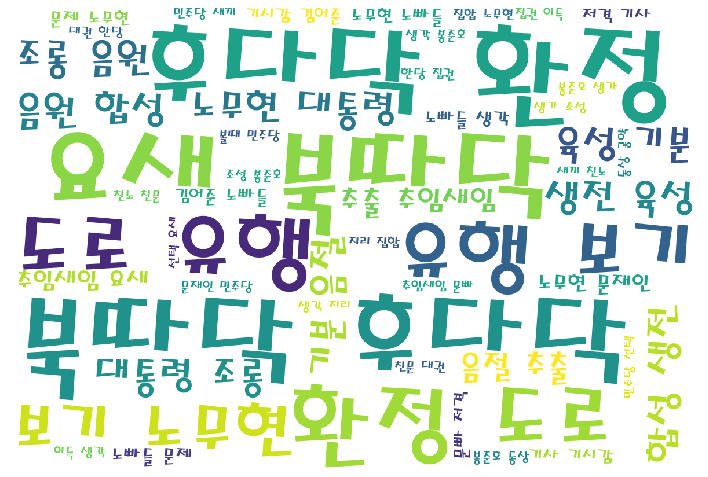

In [104]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')